In [4]:
# Import all required Libraries:

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv("/content/drive/MyDrive/out.csv")

In [6]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log,Cluster
0,2,3,12669,9656,7561,214,2674,1338,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0
1,2,3,7057,9810,9568,1762,3293,1776,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0
2,2,3,6353,8808,7684,2405,3516,7844,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0
3,1,3,13265,1196,4221,6404,507,1788,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,3
4,2,3,22615,5410,7198,3915,1777,5185,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029,3
436,1,3,39228,1431,764,4510,93,2346,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467,3
437,2,3,14531,15488,30243,437,14841,1867,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088,0
438,1,3,10290,1981,2232,1038,168,2125,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527,4


In [7]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Fresh_log', 'Milk_log',
       'Grocery_log', 'Frozen_log', 'Detergents_Paper_log', 'Delicassen_log',
       'Cluster'],
      dtype='object')

In [8]:
# columns to keep:
data= df[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen','Cluster']].rename({'Cluster':'label'},axis=1)



In [9]:

data.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0


In [10]:
X = data.iloc[:, data.columns != 'label']
y = data.iloc[:, data.columns == 'label']

## Train ,Test and Cross-Validation Dataset Construction

In [11]:

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [12]:

print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 281
Number of data points in test data: 88
Number of data points in cross validation data: 71


In [25]:
test_df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
154,1,3,622,55,137,75,7,8
380,1,3,28257,944,2146,3881,600,270


In [26]:
y_test.head(2)

,label
154,2
380,3


<h4> Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

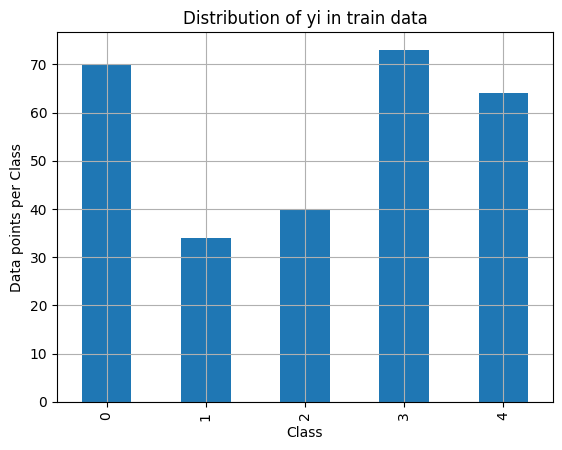

Number of data points in class 4 : 73 ( 25.979 %)
Number of data points in class 1 : 70 ( 24.911 %)
Number of data points in class 5 : 64 ( 22.776 %)
Number of data points in class 3 : 40 ( 14.235 %)
Number of data points in class 2 : 34 ( 12.1 %)
--------------------------------------------------------------------------------


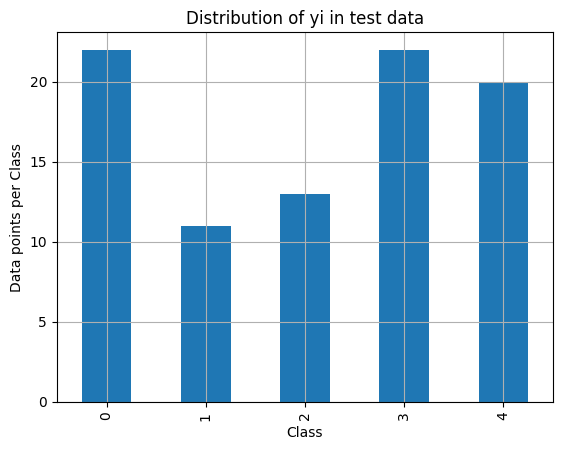

Number of data points in class 1 : 22 ( 25.0 %)
Number of data points in class 4 : 22 ( 25.0 %)
Number of data points in class 5 : 20 ( 22.727 %)
Number of data points in class 3 : 13 ( 14.773 %)
Number of data points in class 2 : 11 ( 12.5 %)
--------------------------------------------------------------------------------


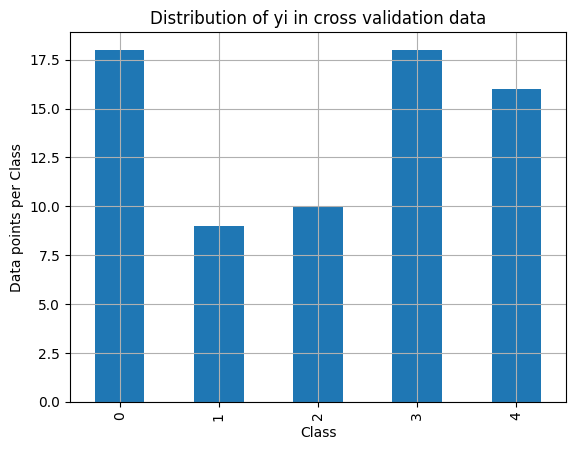

Number of data points in class 4 : 18 ( 25.352 %)
Number of data points in class 1 : 18 ( 25.352 %)
Number of data points in class 5 : 16 ( 22.535 %)
Number of data points in class 3 : 10 ( 14.085 %)
Number of data points in class 2 : 9 ( 12.676 %)


In [13]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['label'].value_counts().sort_index()
test_class_distribution = y_test['label'].value_counts().sort_index()
cv_class_distribution = y_cv ['label'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2> Prediction using a 'Random' Model</h2>

In [14]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 1.9552668390879686
Log loss on Test Data using Random Model 1.9602711757135154
-------------------- Confusion matrix --------------------


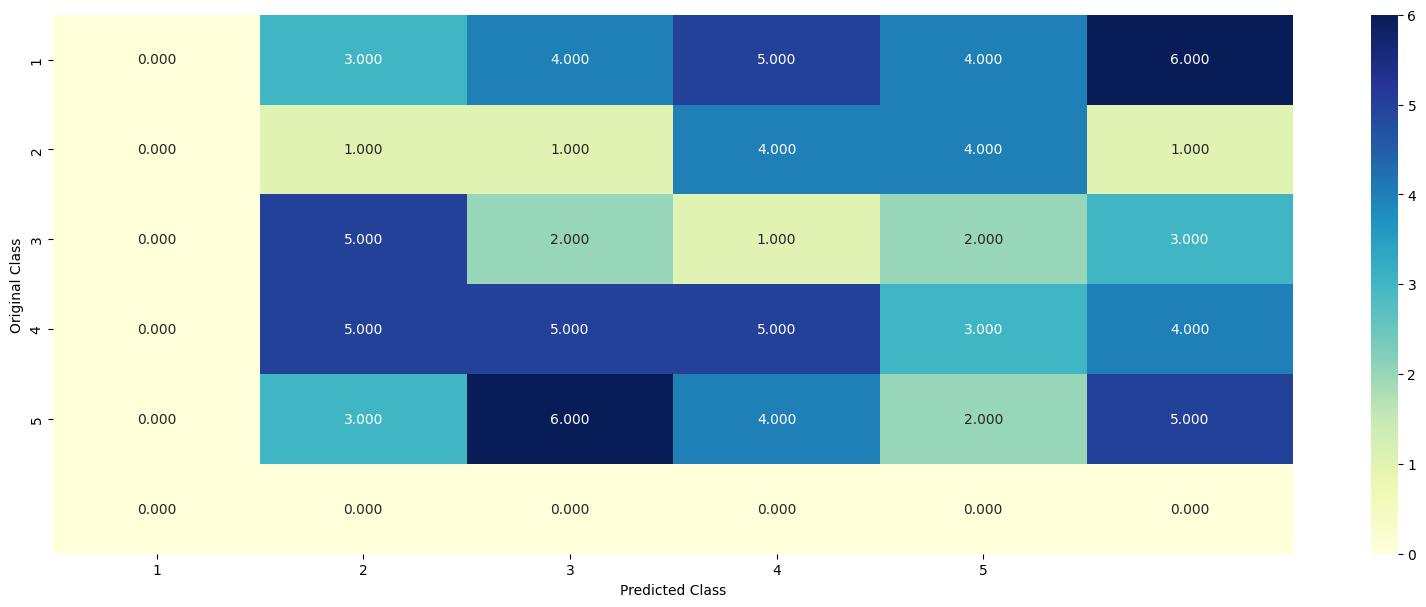

-------------------- Precision matrix (Columm Sum=1) --------------------


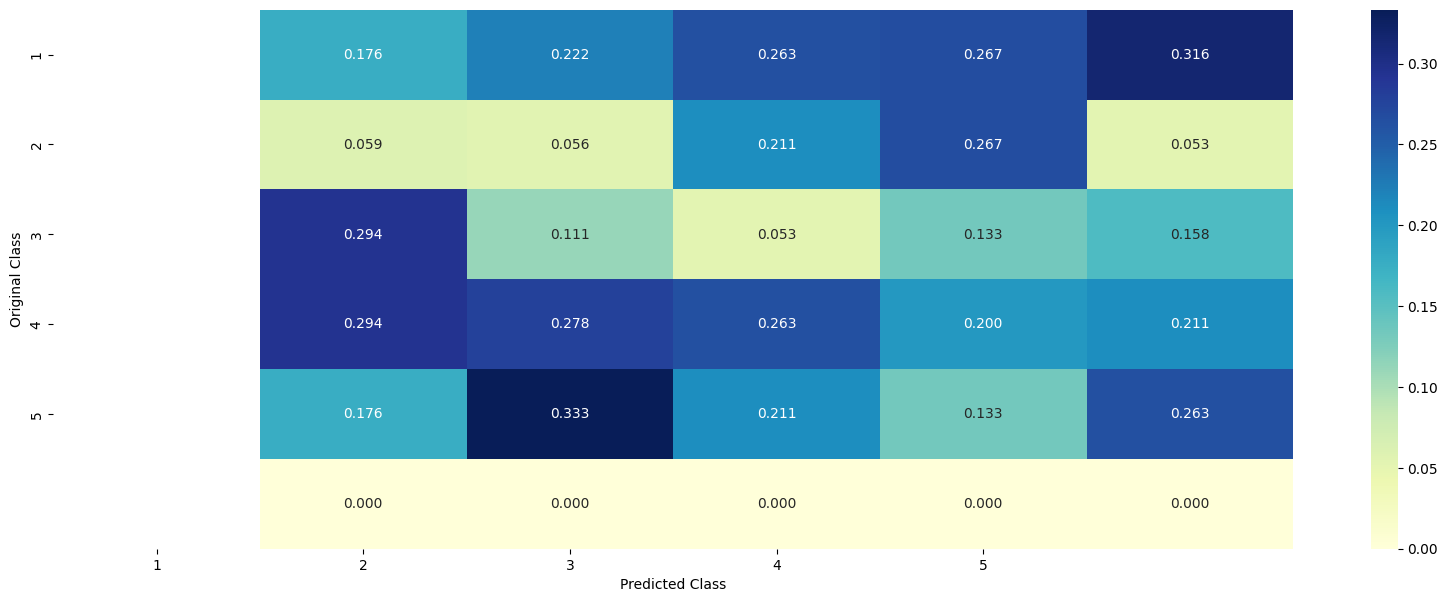

-------------------- Recall matrix (Row sum=1) --------------------


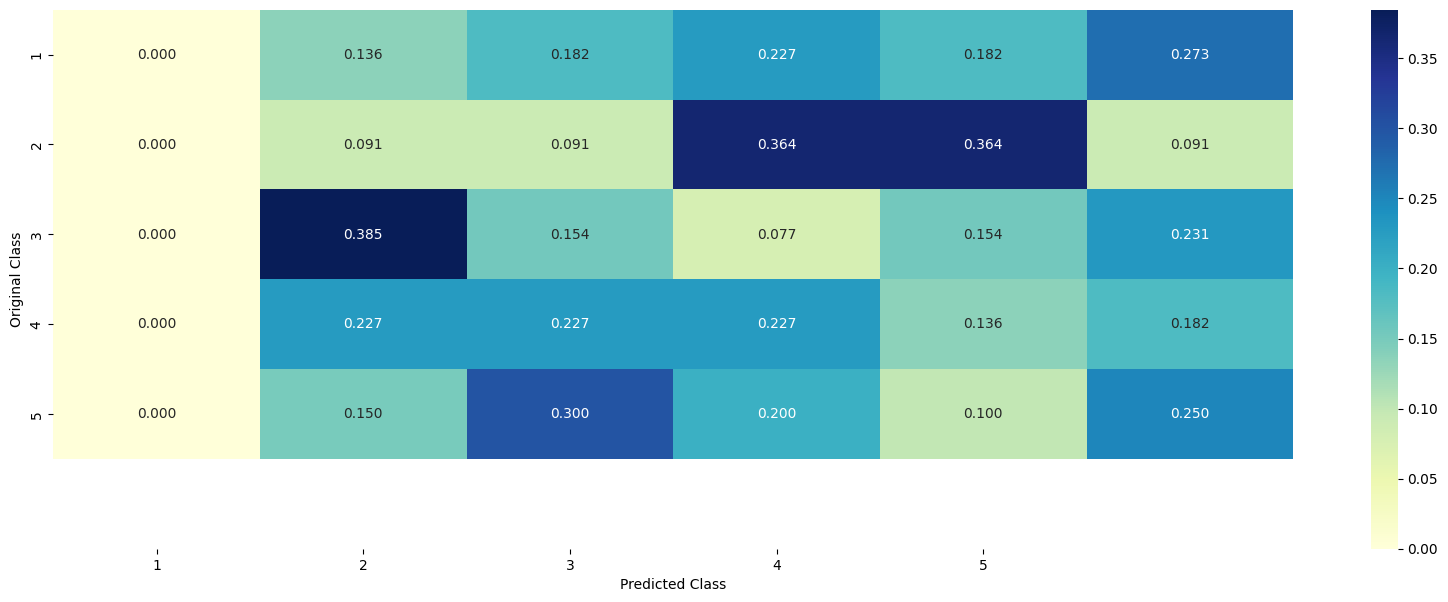

In [15]:
# we need to generate 5 numbers and the sum of numbers should be 1
# one solution is to genarate 5 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,5))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,5)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,5))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,5)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h1> Machine Learning Models</h1>

In [16]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [17]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

 # K Nearest Neighbour Classification

 <h3> Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 0.7441118442740149
for alpha = 11
Log Loss : 0.6969216340130644
for alpha = 15
Log Loss : 0.7121776920159738
for alpha = 21
Log Loss : 0.7509930007614418
for alpha = 31
Log Loss : 0.828533695766335
for alpha = 41
Log Loss : 0.8805090329366275
for alpha = 51
Log Loss : 0.9345630584473299
for alpha = 99
Log Loss : 1.0581144362265518


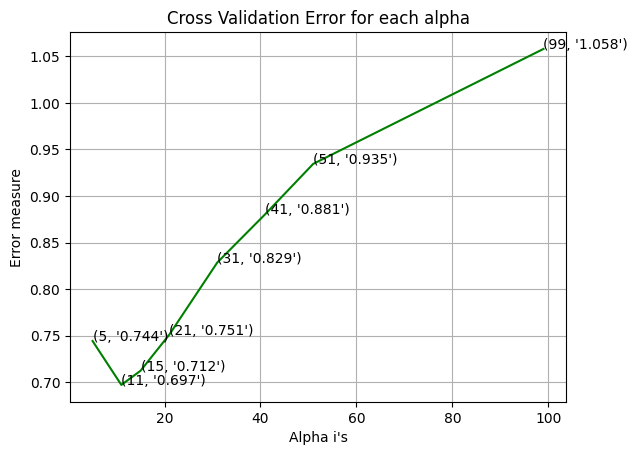

For values of best alpha =  11 The train log loss is: 0.6801236914096979
For values of best alpha =  11 The cross validation log loss is: 0.6969216340130644
For values of best alpha =  11 The test log loss is: 0.7216634281769618


In [18]:

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss : 0.6969216340130644
Number of mis-classified points : 55.7887323943662
-------------------- Confusion matrix --------------------


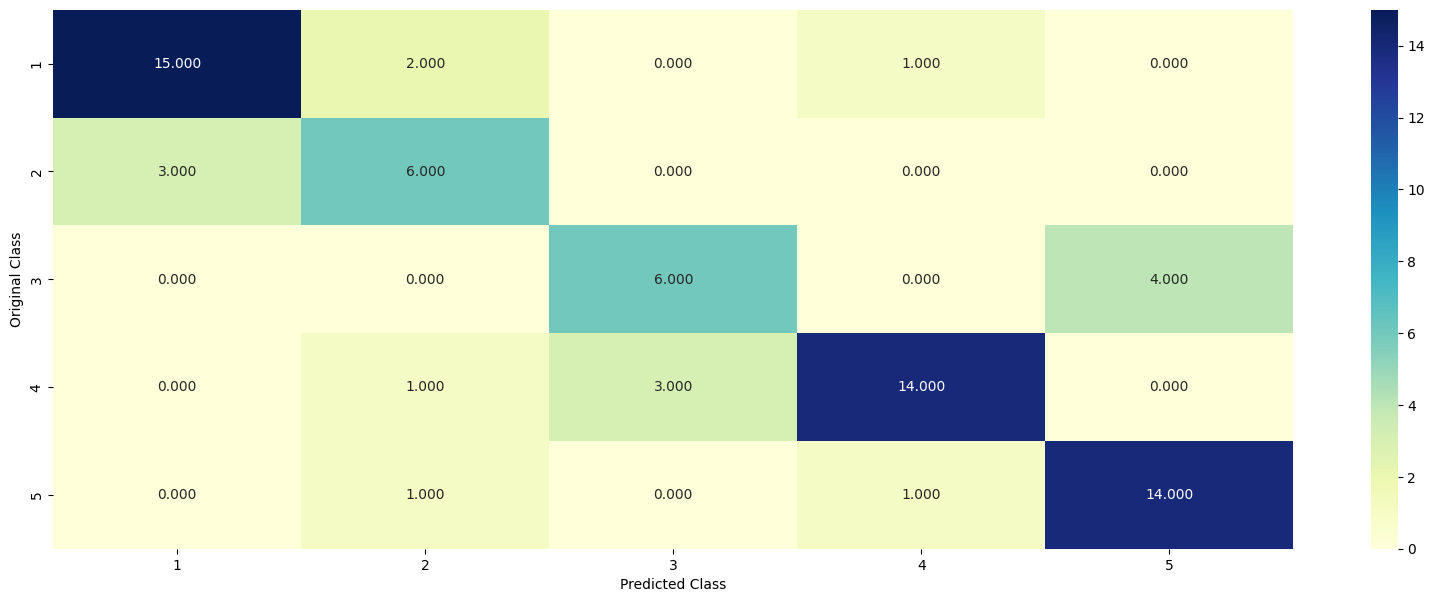

-------------------- Precision matrix (Columm Sum=1) --------------------


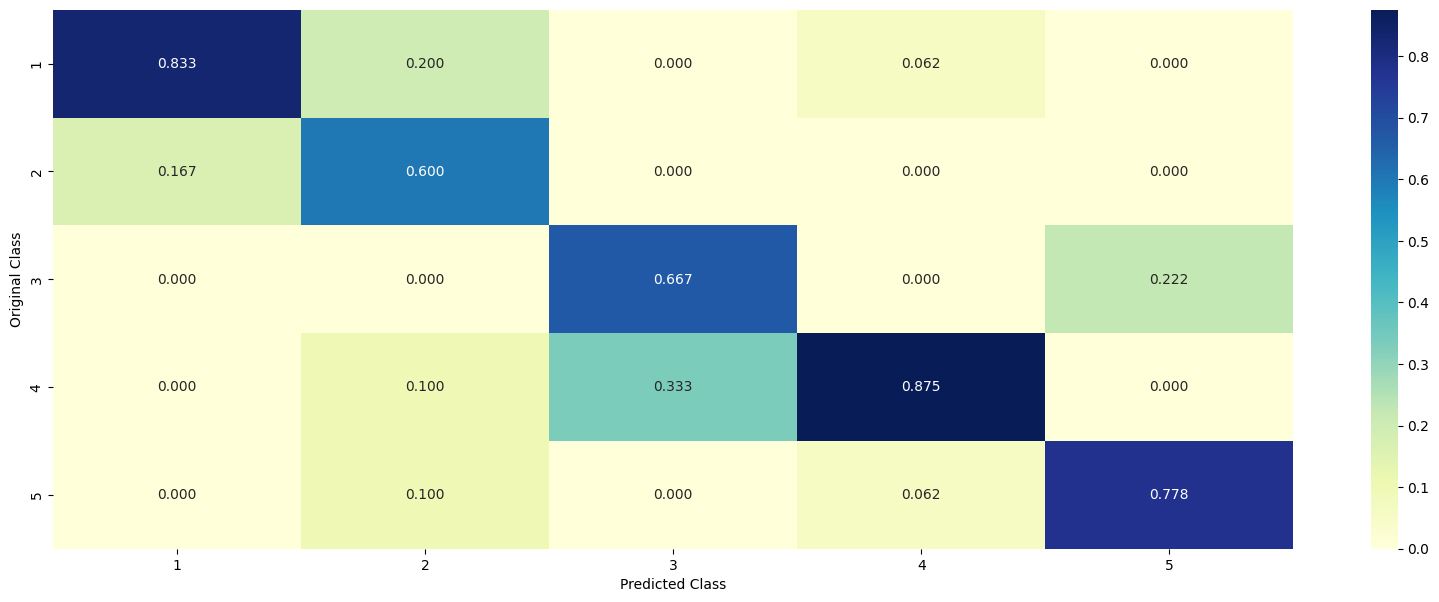

-------------------- Recall matrix (Row sum=1) --------------------


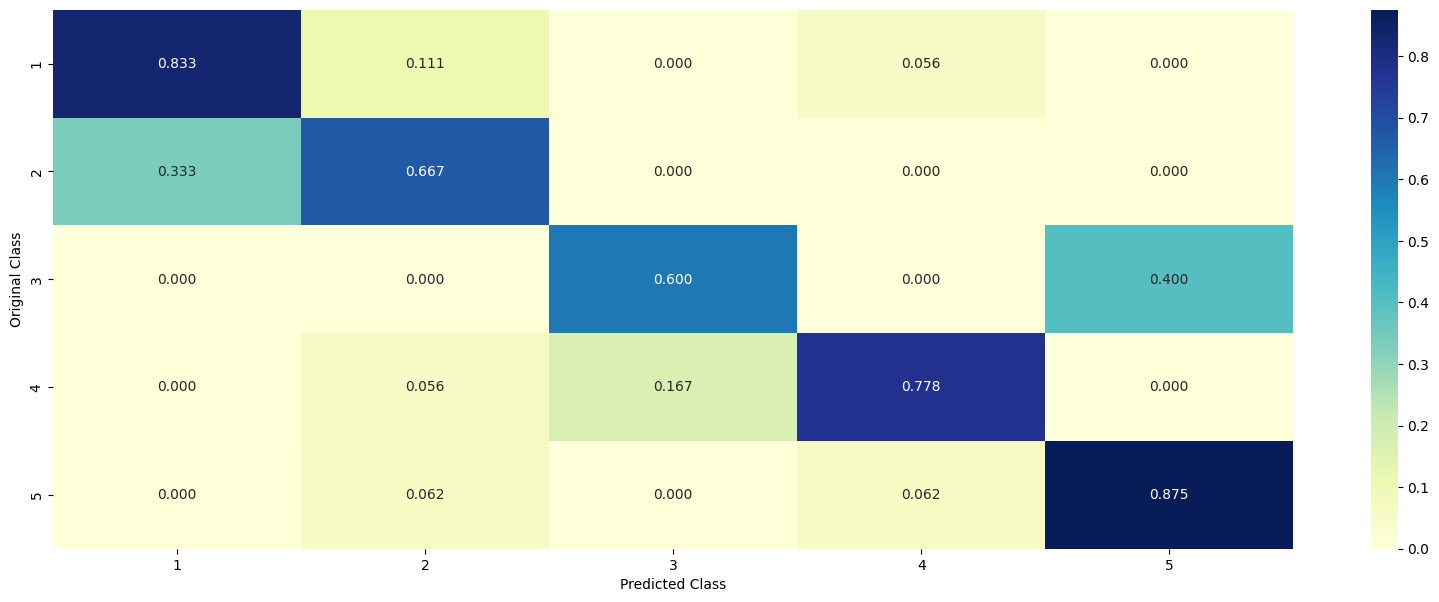

In [19]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df.values, y_train.values, cv_df.values, y_cv.values, clf)


<h2> Logistic Regression</h2>

<h3> With Class balancing</h3>

<h4>Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.569783111440733
for alpha = 1e-05
Log Loss : 1.569783111440733
for alpha = 0.0001
Log Loss : 1.569783111440733
for alpha = 0.001
Log Loss : 1.569783111440733
for alpha = 0.01
Log Loss : 1.569783111440733
for alpha = 0.1
Log Loss : 1.569783111440733
for alpha = 1
Log Loss : 1.569783111440733
for alpha = 10
Log Loss : 1.1897648851169524
for alpha = 100
Log Loss : 1.1584140856479204


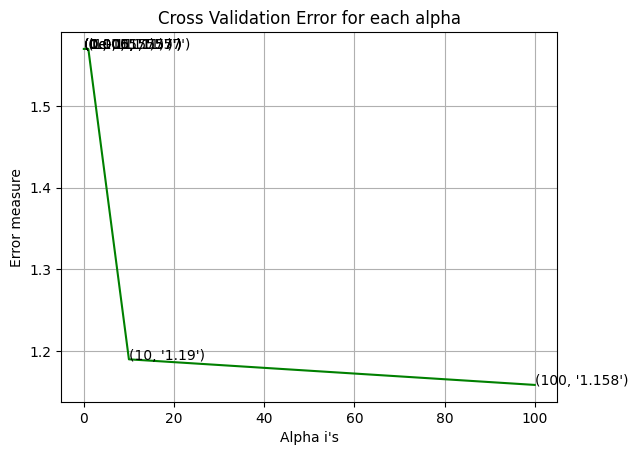

For values of best alpha =  100 The train log loss is: 1.1082997935923813
For values of best alpha =  100 The cross validation log loss is: 1.1584140856479204
For values of best alpha =  100 The test log loss is: 1.1393942730790174


In [20]:
#Logistic Regression
#With Class balancing
#Hyper paramter tuning



alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>Testing the model with best hyper paramters</h3>

Log loss : 1.1584140856479204
Number of mis-classified points : 53.901408450704224
-------------------- Confusion matrix --------------------


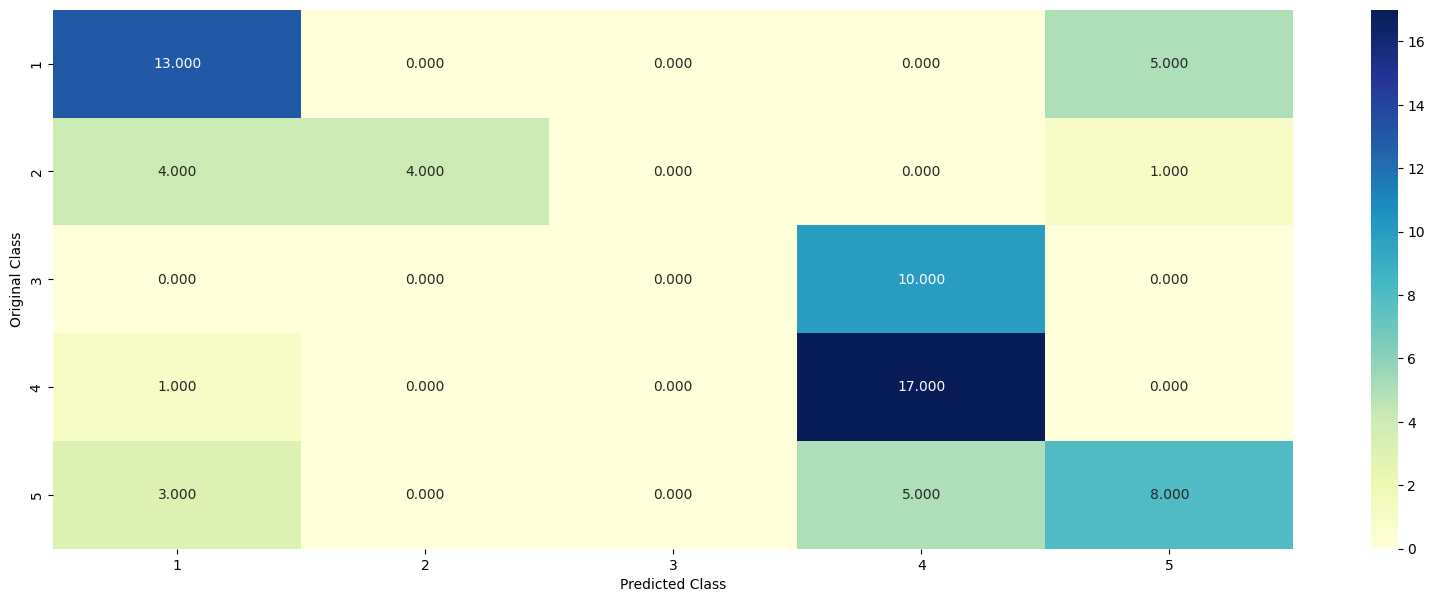

-------------------- Precision matrix (Columm Sum=1) --------------------


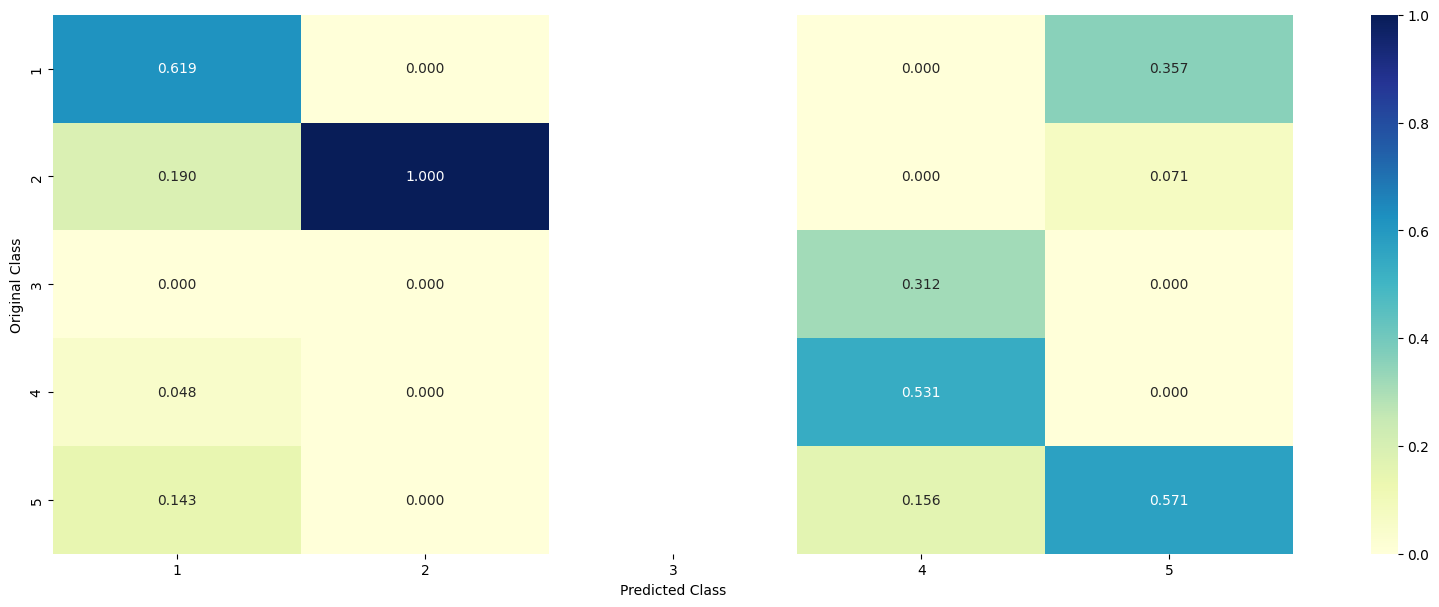

-------------------- Recall matrix (Row sum=1) --------------------


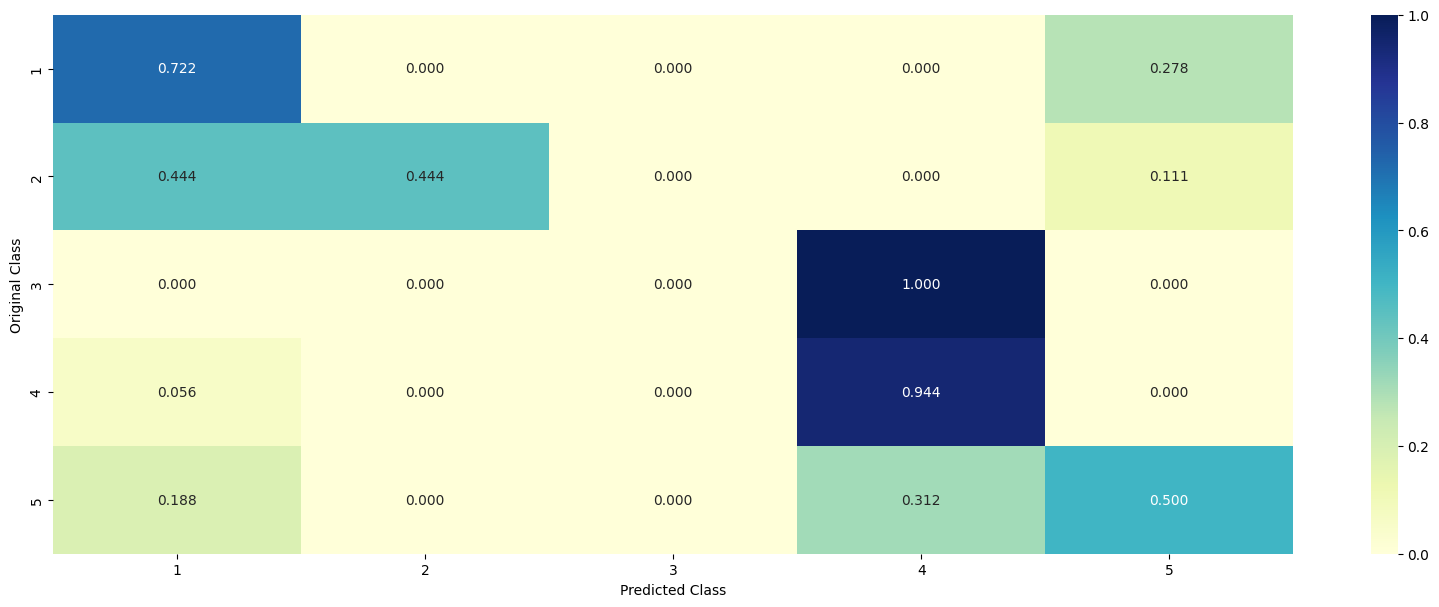

In [21]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df.values, y_train.values, cv_df.values, y_cv.values, clf)

<h2> Random Forest Classifier</h2>

<h3> Hyper paramter tuning </h3>

In [22]:



alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df,y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 0.329279252481409
for n_estimators = 100 and max depth =  10
Log Loss : 0.32343498648965574
for n_estimators = 200 and max depth =  5
Log Loss : 0.33327711247892833
for n_estimators = 200 and max depth =  10
Log Loss : 0.3231731242328389
for n_estimators = 500 and max depth =  5
Log Loss : 0.33324766062542727
for n_estimators = 500 and max depth =  10
Log Loss : 0.3221340785251758
for n_estimators = 1000 and max depth =  5
Log Loss : 0.3332676852585136
for n_estimators = 1000 and max depth =  10
Log Loss : 0.3193509168813194
for n_estimators = 2000 and max depth =  5
Log Loss : 0.33388177093379057
for n_estimators = 2000 and max depth =  10
Log Loss : 0.3182229008222792
For values of best estimator =  2000 The train log loss is: 0.13711853200476223
For values of best estimator =  2000 The cross validation log loss is: 0.3182229008222792
For values of best estimator =  2000 The test log loss is: 0.3550100398202813


<h3> Testing model with best hyper parameters</h3>

Log loss : 0.3182229008222792
Number of mis-classified points : 55.88732394366197
-------------------- Confusion matrix --------------------


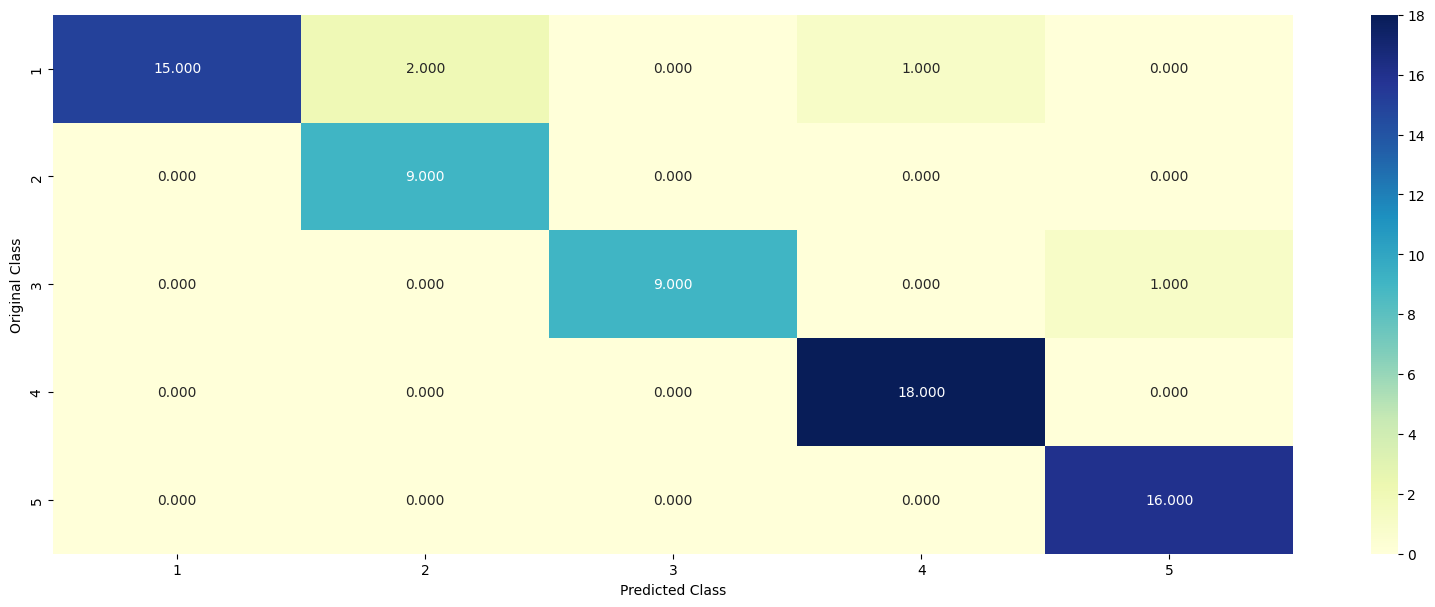

-------------------- Precision matrix (Columm Sum=1) --------------------


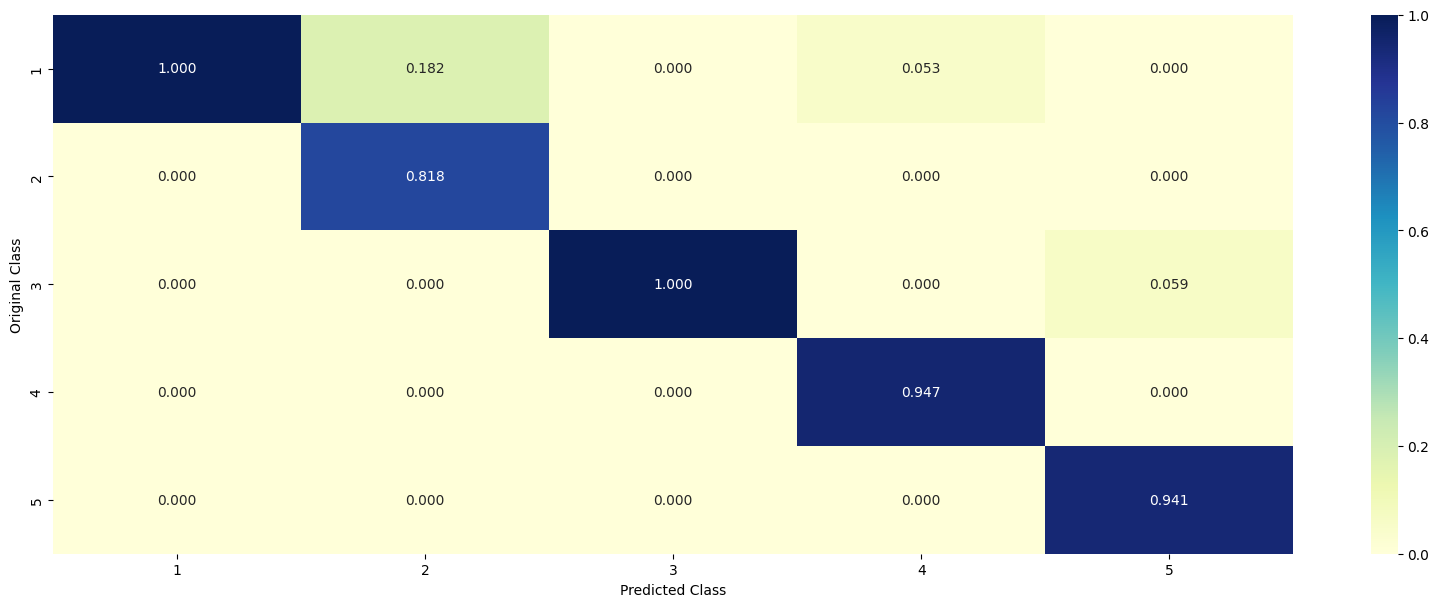

-------------------- Recall matrix (Row sum=1) --------------------


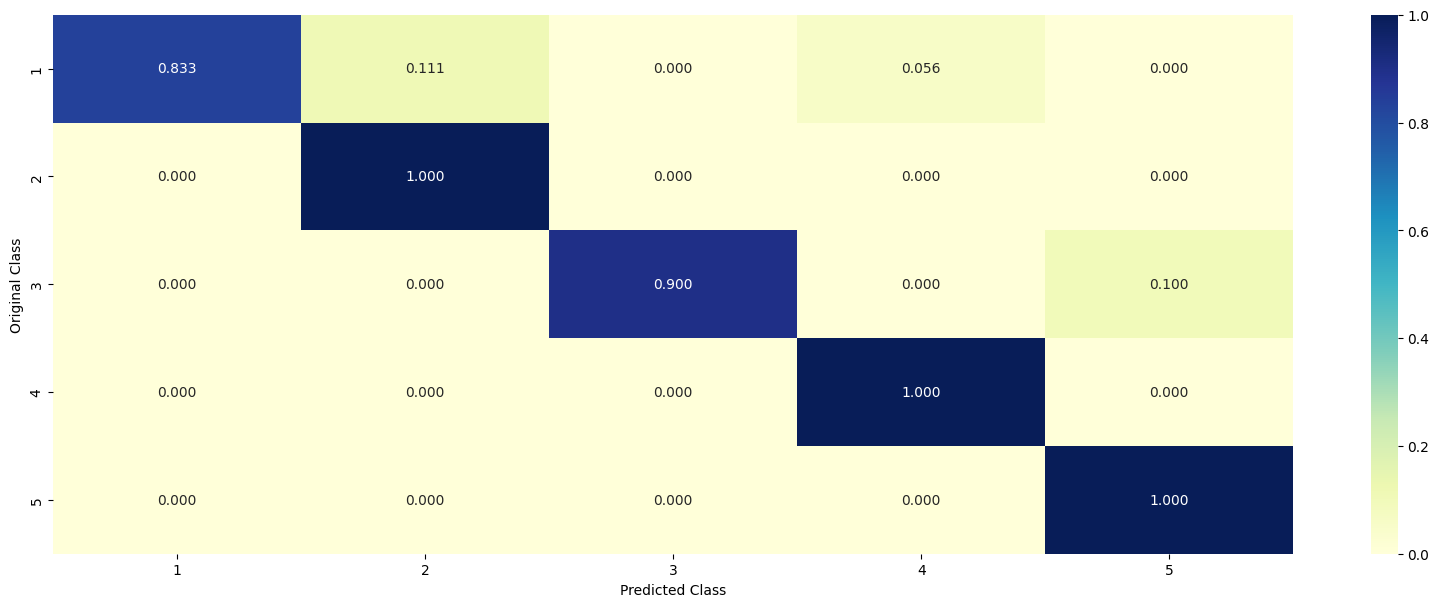

In [23]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
# predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
predict_and_plot_confusion_matrix(train_df.values, y_train.values, cv_df.values, y_cv.values, clf)

##Conclusions:
1. Among 3 ML Models , Random Forest is the best ML Model for our task.
2. Train and test performance of Model can be furthur improved by using Deep Learning models ,However at the Cost of computational expense. 

In [24]:
import pickle
pickle.dump(sig_clf, open('/content/drive/MyDrive/final_prediction.pickle', 'wb'))